# Question 3 [Marks 40]
Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. Please note: Visualisation is mandatory. You will receive 0 marks
if you do not add visualisation. Data Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master
/Data/Shopping_Revenue.csv

# Import the necessary libraries

In [ ]:
#install lib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv'

# Data Analysis

### Data Cleaning

In [ ]:
# import the dataset
#url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv'
#col_name = ["Id","Open Date","City","City Group","Type", "P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P25","P26","P27","P28","P29","P30","P31","P32","P33","P34","P35","P36","P37","revenue"]
df = pd.read_csv(url)
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [ ]:
# Top 5 dataframe
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [ ]:
#Rebuild Missing Data
df.isnull()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# sum of NA values
df.isna().any().sum()

2

In [ ]:
# Drop NA value
df_new=df.dropna()
df_new

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [ ]:
# Delete Duplicates values
df_new.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
132    False
133    False
134    False
135    False
136    False
Length: 130, dtype: bool

### Data Visualization

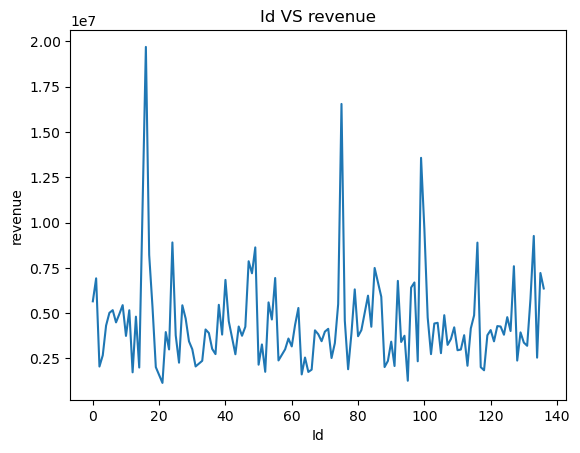

In [ ]:
# Line plot
plt.plot(df_new['Id'],df_new['revenue'])
plt.xlabel("Id")
plt.ylabel("revenue")
plt.title('Id VS revenue')
plt.show()

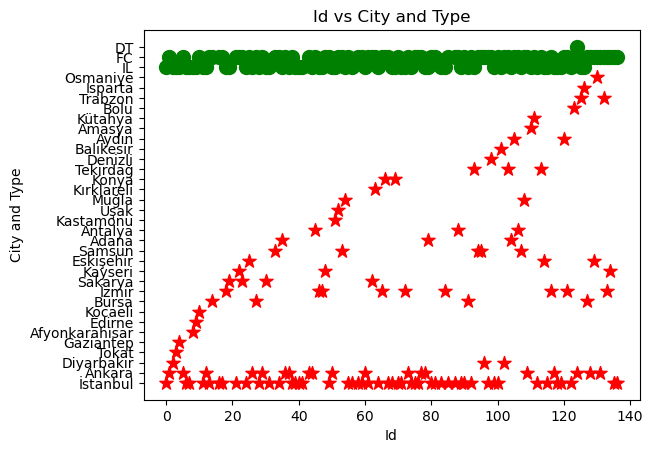

In [ ]:
# Scatter plot
plt.scatter(df_new['Id'],df_new['City'],marker = '*',c='r',s=100)
plt.scatter(df_new['Id'],df_new['Type'],c='g',s=100)
plt.xlabel("Id")
plt.ylabel("City and Type")
plt.title('Id vs City and Type')
plt.show()

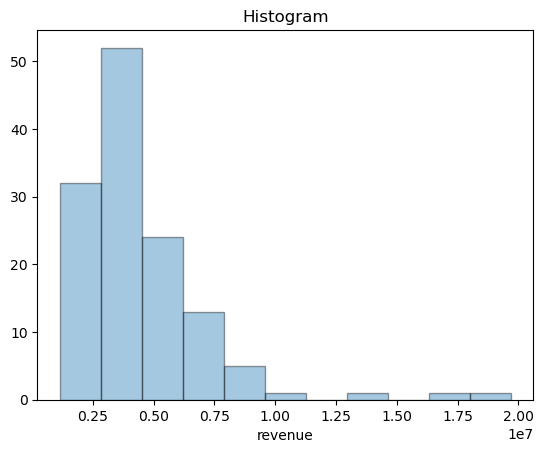

In [ ]:
# Histogram plot
sns.distplot(df_new['revenue'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))
plt.title("Histogram")
plt.show()

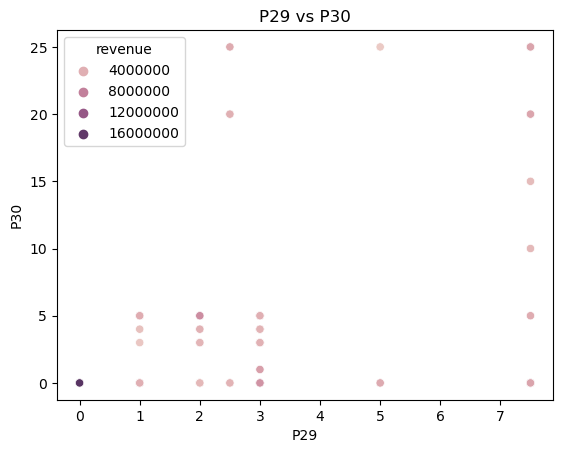

In [ ]:
# Scatter plot
sns.scatterplot(x='P29',y='P30',hue = 'revenue',data=df_new)
plt.title('P29 vs P30')
plt.show()

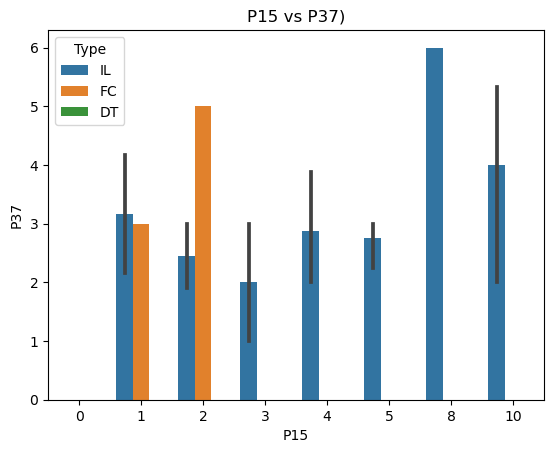

In [ ]:
# Bar plot
sns.barplot(x='P15',y='P37',hue='Type', data=df_new)
plt.title('P15 vs P37)')
plt.show()

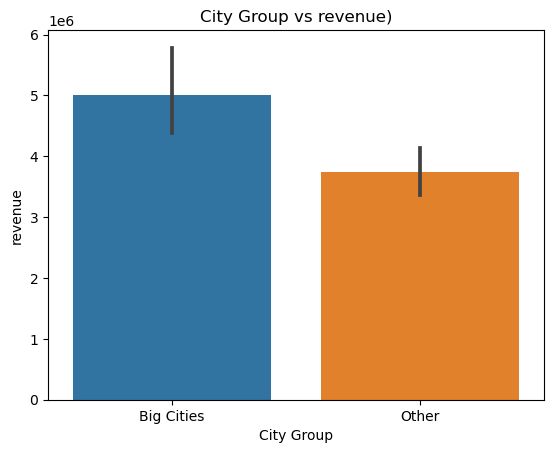

In [ ]:
# Bar plot
sns.barplot(x='City Group',y='revenue', data=df_new)
plt.title('City Group vs revenue)')
plt.show()

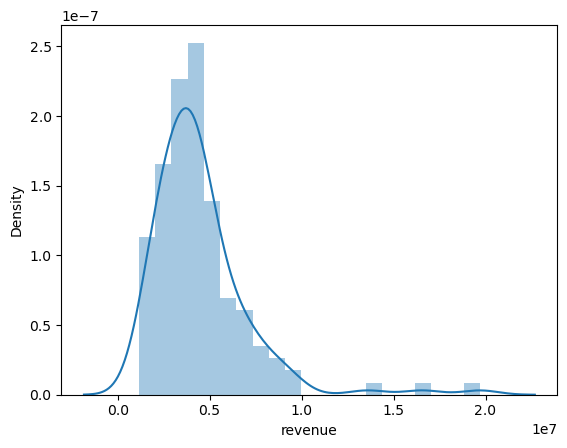

In [ ]:
# Dist plot
sns.distplot(df_new['revenue'])
plt.show()

In [ ]:
# Pair plot
#sns.pairplot(df_new,hue='revenue')
#plt.show()

# Building Predictive Model 

### Split the data into train and test

In [ ]:
# Total Column name
df_new.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [ ]:
# Count revenue column
df_new['revenue'].value_counts()

5653753    1
4467728    1
2738052    1
4758476    1
9652350    1
          ..
4554237    1
6836483    1
3818055    1
5461700    1
6363241    1
Name: revenue, Length: 130, dtype: int64

In [ ]:
# Drop revenue column
X1=df_new.drop('revenue',axis=1)
y = df_new['revenue']
y.head()

0    5653753
1    6923131
2    2055379
3    2675511
4    4316715
Name: revenue, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
y1= le.fit_transform(y)

In [ ]:
y1

array([104, 114,  13,  27,  79,  94,  96,  83,  93, 100,  52,  95,   3,
        90,   9, 129, 121,  98,  11,   0,  64,  34, 124,  55,  18,  99,
        87,  47,  36,  14,  21,  70,  62,  37,  30, 101,  59, 113,  84,
        28,  77,  53,  75, 120, 116, 122,  17,  41,   5, 103,  86, 115,
        23,  35,  50,  38,  80,  97,   2,  26,   4,   7,  67,  60,  48,
        65,  71,  24,  42, 102, 128,  85,   8,  61, 108,  51,  68, 107,
        74, 118, 106,  12,  20,  45,  15, 112,  44,  54,   1, 110, 111,
        19, 127, 126,  88,  29,  81,  82,  31,  92,  40,  49,  73,  32,
        33,  57,  16,  72,  91, 123,  10,   6,  56,  69,  46,  78,  76,
        58,  89,  66, 119,  22,  63,  43,  39, 105, 125,  25, 117, 109])

In [ ]:
X = X1.drop(['Open Date','City','City Group', 'Type'],axis=1)

In [ ]:
X1.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1.0,3.0,5,1,3,2,3,4,3,3


In [ ]:
X.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,4,5.0,4.0,4.0,2,2.0,5.0,4,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,4,5.0,4.0,4.0,1,2.0,5.0,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,2,4.0,2.0,5.0,2,3.0,5.0,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,6,4.5,6.0,6.0,4,4.0,10.0,8,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,3,4.0,3.0,4.0,2,2.0,5.0,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [ ]:
# Slpitting the data into two part train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.40, random_state=1)

In [ ]:
X_train

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
41,41,4,5.0,5.0,4.0,1,5.0,5.0,3,4,...,5.0,1.0,5,5,4,3,3,4,4,1
21,21,5,5.0,4.0,4.0,2,2.0,5.0,4,4,...,3.0,1.0,0,0,0,0,0,0,0,0
136,136,4,5.0,3.0,5.0,2,2.0,5.0,4,4,...,3.0,3.0,0,0,0,0,0,0,0,0
29,29,1,1.0,4.0,4.0,2,1.0,1.0,4,4,...,1.0,3.0,0,0,0,0,0,0,0,0
39,39,4,5.0,4.0,4.0,2,3.0,5.0,4,4,...,2.0,2.0,4,1,2,2,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,4,5.0,4.0,5.0,1,3.0,5.0,5,5,...,5.0,1.0,0,0,0,0,0,0,0,0
9,9,6,4.5,6.0,7.5,6,4.0,10.0,10,10,...,5.0,2.5,0,0,0,0,0,0,0,0
134,134,3,4.0,4.0,4.0,2,3.0,5.0,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
77,77,3,5.0,3.0,5.0,3,4.0,5.0,4,4,...,3.0,2.0,0,0,0,0,0,0,0,0


In [ ]:
X_test

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
115,115,6,4.5,6.0,6.0,4,8.0,10.0,10,10,...,5.0,7.5,25,15,25,4,18,12,16,8
112,112,4,5.0,5.0,4.0,1,5.0,5.0,5,4,...,3.0,3.0,3,2,1,2,2,1,3,3
38,38,3,5.0,4.0,4.0,2,5.0,5.0,4,5,...,2.0,2.0,0,0,0,0,0,0,0,0
131,131,3,4.0,4.0,5.0,3,4.0,5.0,4,4,...,3.0,2.0,0,0,0,0,0,0,0,0
58,58,3,4.0,4.0,5.0,2,2.0,5.0,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
74,74,12,7.5,6.0,6.0,2,8.0,10.0,8,8,...,12.5,2.5,20,9,15,4,12,12,12,4
100,100,3,5.0,4.0,4.0,2,5.0,5.0,5,5,...,4.0,3.0,0,0,0,0,0,0,0,0
50,50,3,5.0,4.0,5.0,3,4.0,5.0,4,4,...,3.0,3.0,5,2,3,2,2,2,3,3
59,59,4,5.0,4.0,4.0,1,3.0,5.0,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
128,128,2,4.0,4.0,4.0,1,2.0,5.0,5,5,...,3.0,2.0,0,0,0,0,0,0,0,0


In [ ]:
y_train

array([ 84,   0, 109,  47,  59,  55,  28, 105,  92, 127,  77,  71,  56,
        29,  78,  63, 129,  53,  23,  87, 120,  18,  32, 106,  19, 103,
        34, 128,  27,  89,  21, 117,  41,  82,  93,  12,   4, 104, 119,
        97, 124,   7,  60,  83, 125,  90,  44,  81,  88,  73,  54,  42,
        46,   9,  14,  36,  16,  95,  15,  11,  49,  64,  86,  99,  96,
       123,  85,  68, 114, 121,  48, 118,  94,  51, 100,  25,   8, 113])

In [ ]:
y_test

array([ 91,  57, 101,  39,  35, 102, 126,  17,  50,  22,  70,  75, 107,
         1,   6,  43,  98,   2,  79,  24,  38, 116, 115,  37,  45,  58,
        20,   3,  13,  67,  74,  69,  76,  80, 110,  26, 112, 111, 122,
        61,  33,   5,  72,  65,  40,  10, 108,  66,  52,  30,  62,  31])

### Split the data into Dependent & Independent variable

In [ ]:
x = df_new.iloc[:,:-1].values
y = df_new.iloc[:,-1].values

In [ ]:
print("******Independent variable*******")
print(" ")
print(x)
print(" ")
print("******Dependent variable*********")
print(" ")
print(y)

******Independent variable*******
 
[[0 '7/17/1999' 'İstanbul' ... 4 3 4]
 [1 '2/14/2008' 'Ankara' ... 0 0 0]
 [2 '3/9/2013' 'Diyarbakır' ... 0 0 0]
 ...
 [134 '7/8/2006' 'Kayseri' ... 0 0 0]
 [135 '10/29/2010' 'İstanbul' ... 0 0 0]
 [136 '9/1/2009' 'İstanbul' ... 0 0 0]]
 
******Dependent variable*********
 
[ 5653753  6923131  2055379  2675511  4316715  5017319  5166635  4491607
  4952497  5444227  3745135  5161370  1734634  4807746  1999097 19696939
  8213524  5337526  2021934  1149870  3956086  2999068  8904084  3778621
  2267425  5435276  4705945  3447890  3008199  2058644  2371202  4100886
  3903884  3028267  2740687  5461700  3818055  6836483  4554237  2732645
  4264176  3752885  4250758  7865428  7201784  8630682  2156098  3273041
  1763231  5595267  4651866  6941173  2390534  3004429  3600467  3164972
  4350573  5286212  1619683  2551252  1756069  1882131  4052733  3836721
  3452382  3982767  4136425  2525375  3347767  5500818 16549064  4590423
  1904842  3871344  6313221  372

# Building Multiple Model for Good accuray

### 1.KNN Algorithm

In [ ]:
# import the model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= knn.predict(X_test)

In [ ]:
# import the metric
from sklearn import metrics

In [ ]:
# Find the Accuracy
print('accuracy', metrics.accuracy_score(y_test, y_pred))

accuracy 0.0


In [ ]:
# import the metric
from sklearn import metrics

In [ ]:
# Find the Accuracy
print('accuracy', metrics.accuracy_score(y_test, y_pred))

accuracy 0.0


### 2.Decision Tree Algorithm

In [ ]:
# import the model
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [ ]:
# we do fit the model
model=model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Find the Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


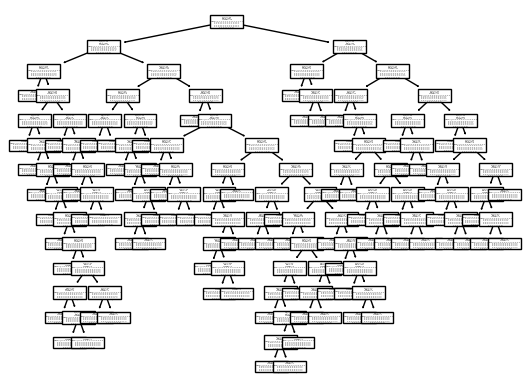

In [ ]:
# Show the Tree
tree.plot_tree(model)
plt.show()

### 3.Random Forest Regressor

In [ ]:
# import the model
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# find the Accuracy
print("Accuracy:",model1.score(X_test, y_test))

Accuracy: 0.0


In [ ]:
#if we increase the values of estimators then we got more accuracy.
model2= RandomForestClassifier(n_estimators=40)
model2.fit(X_train,y_train)
print("Accuracy:",model2.score(X_test,y_test))

Accuracy: 0.0


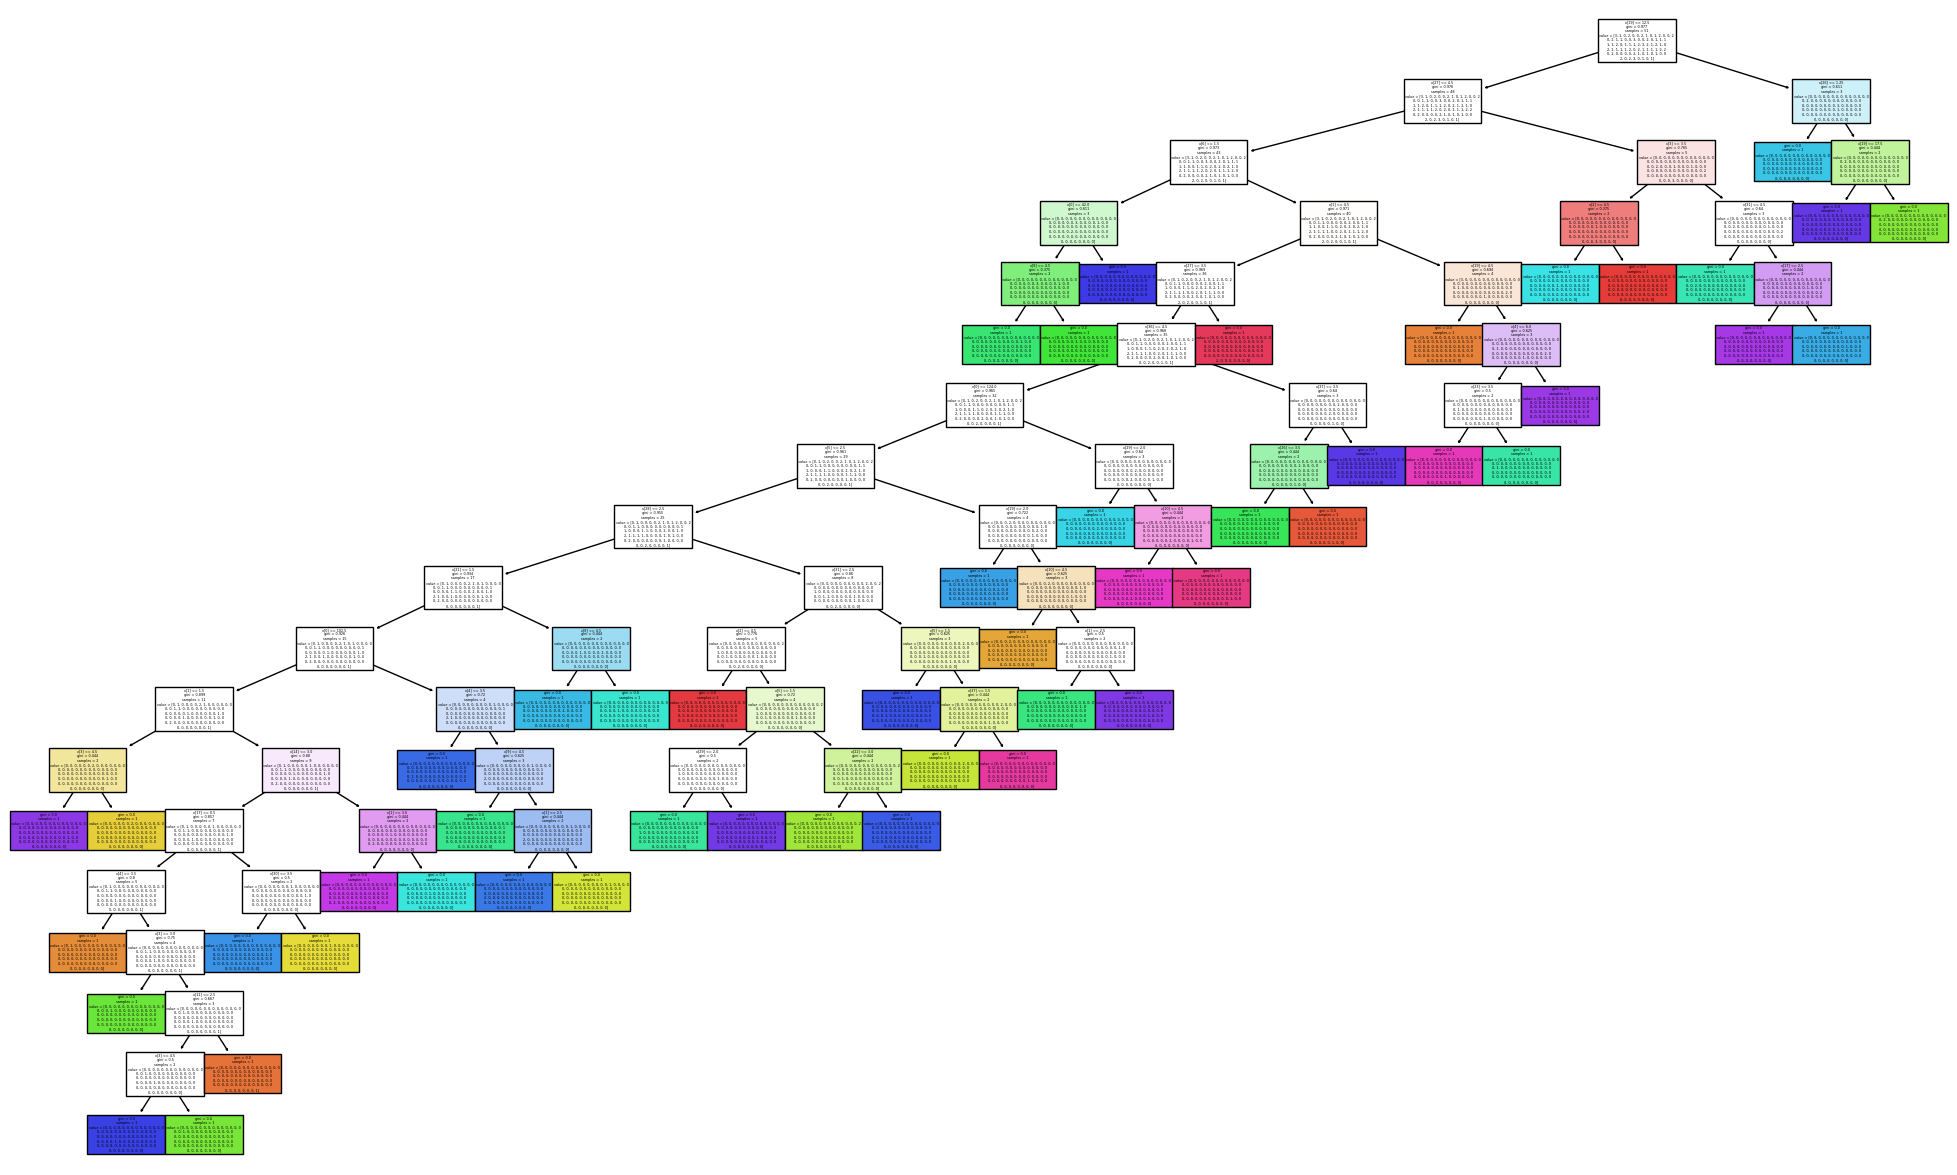

In [ ]:
# Show the graph of random forest Regressor
plt.figure(figsize=(25,15))
tree.plot_tree(model1.estimators_[1], filled= True)
plt.show()

### 4.Naive Bayes Algorithm

In [ ]:
# import the model
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

In [ ]:
# Fit the the model
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Pridicted values
y_pred= model.predict(X_test)

In [ ]:
# import the metric
from sklearn import metrics

In [ ]:
# find the Accuracy
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

Accuracy 0.0


# Features Selection

### Embedded Method

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X,y)

Ridge()

In [ ]:
def print_coefs(coef,name = None,sort =False):
    if name == None:
        name = ["X%s" % x for x in range(len(coef))]
    lst = zip(coef,name)
    if sort:
        lst = sorted(lst,key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s " % (round(coefs,3),name) for coefs,name in lst)

In [ ]:
print("Ridge model:",print_coefs(ridge_reg.coef_))

Ridge model: 2265.207 * X0  + 267014.617 * X1  + 334022.659 * X2  + -142698.175 * X3  + -320910.798 * X4  + -34068.585 * X5  + 412299.029 * X6  + -22710.42 * X7  + -1219746.799 * X8  + 1327155.595 * X9  + -186077.421 * X10  + -164206.893 * X11  + -127366.81 * X12  + -675146.477 * X13  + -528916.324 * X14  + 78373.587 * X15  + -480743.933 * X16  + 516092.981 * X17  + 477097.495 * X18  + -47958.519 * X19  + -365415.893 * X20  + 106138.753 * X21  + -315622.298 * X22  + 126835.029 * X23  + 587835.25 * X24  + 531058.539 * X25  + -1314222.69 * X26  + 112372.97 * X27  + 571008.1 * X28  + -112582.671 * X29  + 7535.48 * X30  + 103294.987 * X31  + -272221.724 * X32  + -367424.937 * X33  + 179055.14 * X34  + -354171.651 * X35  + 566552.097 * X36  + 273773.184 * X37 


### Wrapper Method

In [ ]:
# import features selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Features Extraction
model_lr = LogisticRegression()
recur_fe = RFE(model_lr,step = 20)
Feature = recur_fe.fit(X,y)
print("Number of Features : %s" %(Feature.n_features_))
print("Selected features are : %s" % (Feature.support_))
print("Feature Ranking is as follow: %s" %(Feature.ranking_))

Number of Features : 19
Selected features are : [ True  True  True  True  True  True  True  True  True False False  True
  True  True False False False False False  True  True  True  True  True
 False False False False  True  True False False False False False False
 False False]
Feature Ranking is as follow: [1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 2
 2]


### Filter Method

In [ ]:
# import features selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Features extraction
chi_best = SelectKBest(score_func=chi2,k=4)
k_best = chi_best.fit(X,y)

# Print the score
np.set_printoptions(precision=3)
print(k_best.scores_)

k_features = k_best.transform(X)
print(k_features[0:5,:]

SyntaxError: incomplete input (713587293.py, line 10)